In [33]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from lightgbm import plot_importance
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [4]:
train = pd.read_csv('./data/train_features.csv')
train_label = pd.read_csv('./data/train_labels.csv')
test = pd.read_csv('./data/test_features.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [5]:
features = ['id', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z']
X_data = train[features].groupby('id').agg(['sum', 'median', 'max', 'min', 'mean'])
X_exam = test[features].groupby('id').agg(['sum', 'median', 'max', 'min', 'mean'])

Y_data = train_label['label']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=156, stratify=Y_data)

In [13]:
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1065 to 1509
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (acc_x, sum)     2500 non-null   float64
 1   (acc_x, median)  2500 non-null   float64
 2   (acc_x, max)     2500 non-null   float64
 3   (acc_x, min)     2500 non-null   float64
 4   (acc_x, mean)    2500 non-null   float64
 5   (acc_y, sum)     2500 non-null   float64
 6   (acc_y, median)  2500 non-null   float64
 7   (acc_y, max)     2500 non-null   float64
 8   (acc_y, min)     2500 non-null   float64
 9   (acc_y, mean)    2500 non-null   float64
 10  (acc_z, sum)     2500 non-null   float64
 11  (acc_z, median)  2500 non-null   float64
 12  (acc_z, max)     2500 non-null   float64
 13  (acc_z, min)     2500 non-null   float64
 14  (acc_z, mean)    2500 non-null   float64
 15  (gy_x, sum)      2500 non-null   float64
 16  (gy_x, median)   2500 non-null   float64
 17  (gy_x, max)

In [14]:
# tuple형태라서 모델링에 넣을 수 없기 때문에 단일 index로 만들어준다.
X_columns = [agg + '_' + column for agg,column in X_train.columns]
X_train.columns = X_columns
X_test.columns = X_columns
display(X_train.head())

,acc_x_sum,acc_x_median,acc_x_max,acc_x_min,acc_x_mean,acc_y_sum,acc_y_median,acc_y_max,acc_y_min,acc_y_mean,...,gy_y_sum,gy_y_median,gy_y_max,gy_y_min,gy_y_mean,gy_z_sum,gy_z_median,gy_z_max,gy_z_min,gy_z_mean
id,,,,,,,,,,,,,,,,,,,,,
1065,-548.281779,-0.916820,-0.613732,-1.370515,-0.913803,-252.030914,-0.386938,-0.071719,-0.816189,-0.420052,...,-112.660131,0.279046,29.225037,-21.831527,-0.187767,1406.301155,1.324260,41.294192,-35.198222,2.343835
2191,-134.799688,-0.225088,-0.113649,-0.306985,-0.224666,-212.893446,-0.347944,-0.200794,-0.501492,-0.354822,...,967.136888,1.103439,26.896097,-13.042902,1.611895,-1577.570688,-2.611113,11.548409,-16.397420,-2.629284
2345,-419.136567,-0.696449,-0.034642,-1.466776,-0.698561,76.410260,0.118425,1.246646,-0.794789,0.127350,...,-1195.567893,4.757457,184.982429,-254.776055,-1.992613,1745.727397,-3.192059,290.053127,-150.364136,2.909546
3051,-520.354609,-0.908607,-0.238113,-1.425370,-0.867258,-248.928154,-0.367012,0.013688,-0.979675,-0.414880,...,-484.560904,0.438974,82.119412,-72.813271,-0.807602,1920.171309,2.047694,101.026685,-76.915546,3.200286
2493,-50.385490,-0.083987,-0.073691,-0.091247,-0.083976,-320.562960,-0.534477,-0.523347,-0.543824,-0.534272,...,-424.499401,-0.706361,-0.398673,-1.119808,-0.707499,213.303725,0.356888,0.638281,-0.042485,0.355506


[1]	valid_0's multi_logloss: 2.05611
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.90606
[3]	valid_0's multi_logloss: 1.79633
[4]	valid_0's multi_logloss: 1.72938
[5]	valid_0's multi_logloss: 1.66737
[6]	valid_0's multi_logloss: 1.62142
[7]	valid_0's multi_logloss: 1.57803
[8]	valid_0's multi_logloss: 1.54226
[9]	valid_0's multi_logloss: 1.51136
[10]	valid_0's multi_logloss: 1.49132
[11]	valid_0's multi_logloss: 1.47146
[12]	valid_0's multi_logloss: 1.45869
[13]	valid_0's multi_logloss: 1.44787
[14]	valid_0's multi_logloss: 1.43862
[15]	valid_0's multi_logloss: 1.42773
[16]	valid_0's multi_logloss: 1.41912
[17]	valid_0's multi_logloss: 1.41079
[18]	valid_0's multi_logloss: 1.40273
[19]	valid_0's multi_logloss: 1.39652
[20]	valid_0's multi_logloss: 1.3922
[21]	valid_0's multi_logloss: 1.3884
[22]	valid_0's multi_logloss: 1.38608
[23]	valid_0's multi_logloss: 1.38394
[24]	valid_0's multi_logloss: 1.38144
[25]	valid_0's multi_logloss: 1.38097

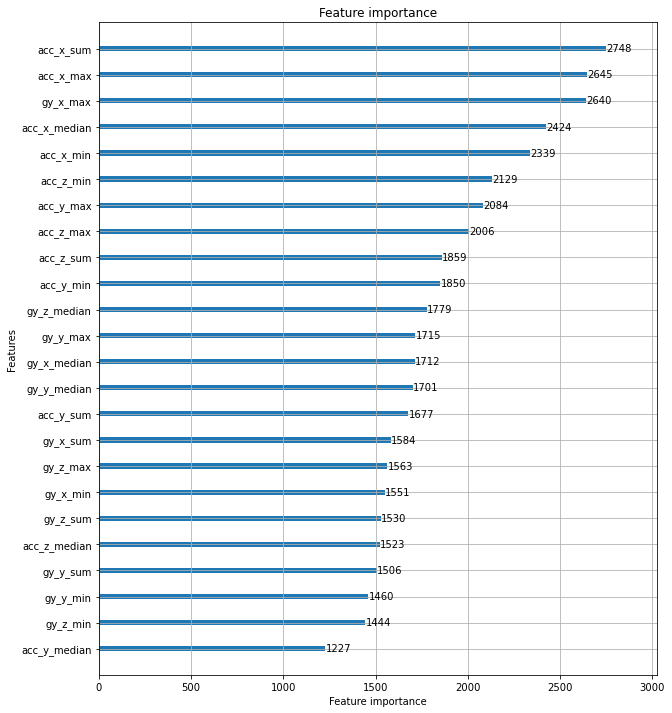

In [44]:
lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test, Y_test)]
lgbm_wrapper.fit(X_train, Y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:1]

# get_clf_eval(Y_test, pred)

confusion = confusion_matrix(Y_test, pred)
accuracy = accuracy_score(Y_test, pred)
# precision = precision_score(Y_test, Y_pred)
# recall = recall_score(Y_test, Y_pred)
# F1 = f1_score(Y_test, Y_pred)
# AUC = roc_auc_score(Y_test, Y_pred, pred_proba)
print('오차행렬:\n', confusion)
print('\n정확도: {:.4f}'.format(accuracy))
# print('정밀도: {:.4f}'.format(precision))
# print('재현율: {:.4f}'.format(recall))
# print('F1: {:.4f}'.format(F1))
# print('AUC: {:.4f}'.format(AUC))

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)
plt.show()

[1]	valid_0's multi_logloss: 2.05611
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.90606
[3]	valid_0's multi_logloss: 1.79633
[4]	valid_0's multi_logloss: 1.72938
[5]	valid_0's multi_logloss: 1.66737
[6]	valid_0's multi_logloss: 1.62142
[7]	valid_0's multi_logloss: 1.57803
[8]	valid_0's multi_logloss: 1.54226
[9]	valid_0's multi_logloss: 1.51136
[10]	valid_0's multi_logloss: 1.49132
[11]	valid_0's multi_logloss: 1.47146
[12]	valid_0's multi_logloss: 1.45869
[13]	valid_0's multi_logloss: 1.44787
[14]	valid_0's multi_logloss: 1.43862
[15]	valid_0's multi_logloss: 1.42773
[16]	valid_0's multi_logloss: 1.41912
[17]	valid_0's multi_logloss: 1.41079
[18]	valid_0's multi_logloss: 1.40273
[19]	valid_0's multi_logloss: 1.39652
[20]	valid_0's multi_logloss: 1.3922
[21]	valid_0's multi_logloss: 1.3884
[22]	valid_0's multi_logloss: 1.38608
[23]	valid_0's multi_logloss: 1.38394
[24]	valid_0's multi_logloss: 1.38144
[25]	valid_0's multi_logloss: 1.38097

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

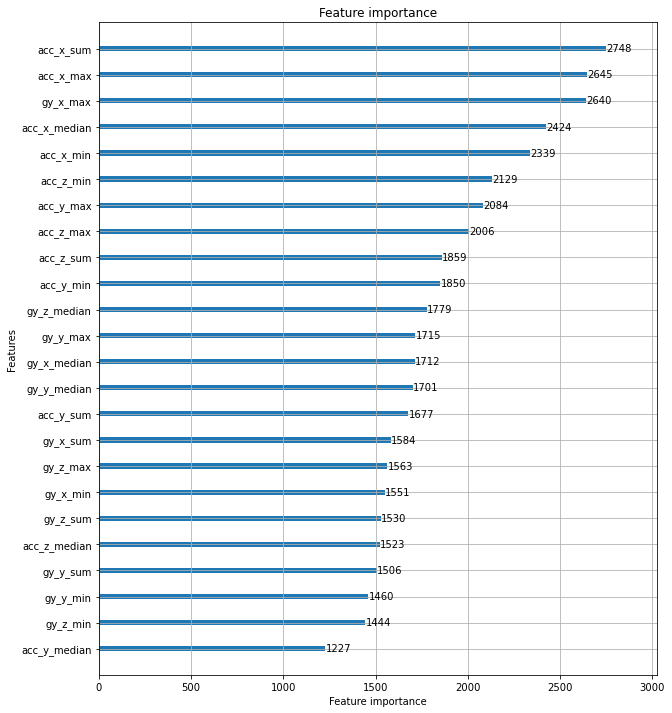

In [23]:
model = LGBMClassifier(n_estimators=400)
evals = [(X_test, Y_test)]
lgb_model = model.fit(X_train, Y_train, early_stopping_rounds=100, 
                        eval_metric='logloss',eval_set=evals,verbose=True)

# 예측하기
y_pre = lgb_model.predict(X_test)
y_pred_probs = lgb_model.predict_proba(X_test)[:,1]

# 특성 중요도 시각화
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgb_model, ax=ax)

[1]	valid_0's multi_logloss: 2.05611
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.90606
[3]	valid_0's multi_logloss: 1.79633
[4]	valid_0's multi_logloss: 1.72938
[5]	valid_0's multi_logloss: 1.66737
[6]	valid_0's multi_logloss: 1.62142
[7]	valid_0's multi_logloss: 1.57803
[8]	valid_0's multi_logloss: 1.54226
[9]	valid_0's multi_logloss: 1.51136
[10]	valid_0's multi_logloss: 1.49132
[11]	valid_0's multi_logloss: 1.47146
[12]	valid_0's multi_logloss: 1.45869
[13]	valid_0's multi_logloss: 1.44787
[14]	valid_0's multi_logloss: 1.43862
[15]	valid_0's multi_logloss: 1.42773
[16]	valid_0's multi_logloss: 1.41912
[17]	valid_0's multi_logloss: 1.41079
[18]	valid_0's multi_logloss: 1.40273
[19]	valid_0's multi_logloss: 1.39652
[20]	valid_0's multi_logloss: 1.3922
[21]	valid_0's multi_logloss: 1.3884
[22]	valid_0's multi_logloss: 1.38608
[23]	valid_0's multi_logloss: 1.38394
[24]	valid_0's multi_logloss: 1.38144
[25]	valid_0's multi_logloss: 1.38097

NameError: name 'confusion_matrix' is not defined